Presidential Approval Ratings - To prove presidential ratings affect the next president's party affiliation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime



In [2]:
Data_Path = f"Approval Rating Data/American Presidency Project - Approval Ratings for POTUS - "
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
             "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]

Ratings = {}

for names in Presidents:
    File_Path = f"{Data_Path}{names}.csv"
    President_Ratings = pd.read_csv(File_Path)
    Ratings.update({names:President_Ratings})
#     Ratings[names]["End Date"] = Ratings[names]["End Date"].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").date())
    Ratings[names]["End Date"] = pd.to_datetime(Ratings[names]["End Date"])
    Ratings[names]["Start Date"] = pd.to_datetime(Ratings[names]["Start Date"])
    #df['date'] = pd.to_datetime(df['date'])
    # Ratings["George W. Bush"]["End Date"] = datetime.strptime(Ratings["George W. Bush"]["End Date"], "%m/%d/%Y").date()
    Ratings[names]["Year"]=Ratings[names]["End Date"].dt.year
    Ratings[names]["Month"]=Ratings[names]["End Date"].dt.month
    Ratings[names].to_csv(f"Cleaned President Ratings/{names}-Ratings.csv",index = False)

#Clean up to group by months



C:\Users\Abraham\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


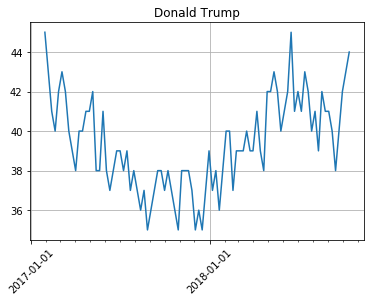

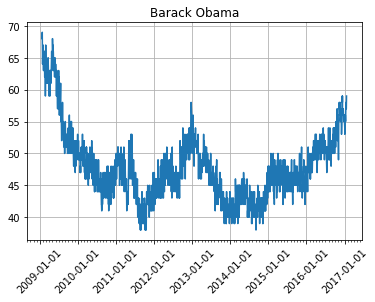

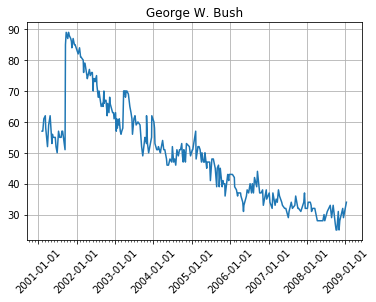

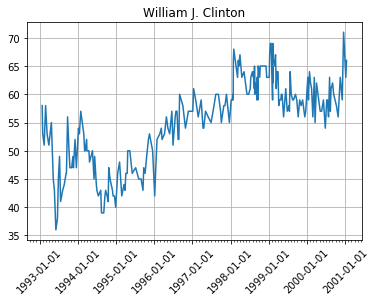

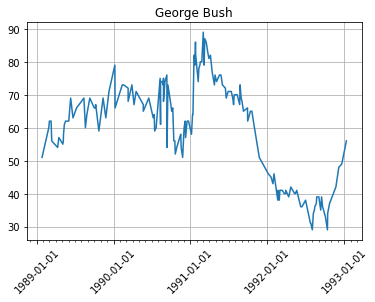

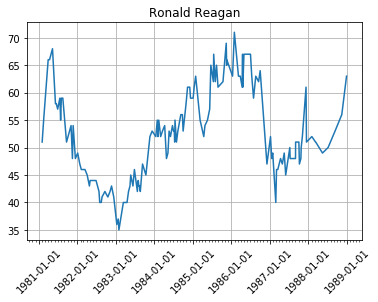

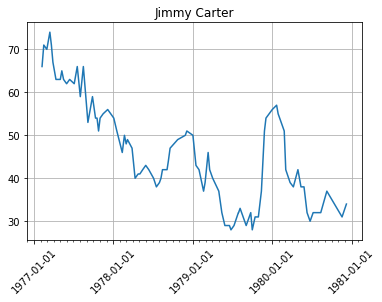

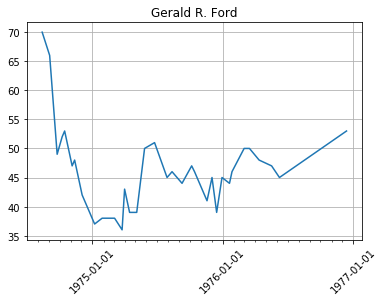

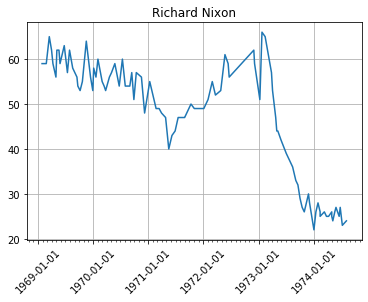

In [3]:
for names in Presidents:
    plt.plot(Ratings[names]["End Date"],Ratings[names]["Approving"])
    plt.xticks(rotation=45)
    years = dates.YearLocator()
    plt.gca().xaxis.set_major_locator(years)
    plt.gca().xaxis.set_minor_locator(dates.MonthLocator())
#     plt.gcf().autofmt_xdate()
    plt.title(names)
    plt.grid(True)
    plt.show()

